In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
data_fe = pd.read_csv('../data/interim/data_eda.csv', index_col=0)

In [3]:
data_fe.head()

,Comunidades y Ciudades Autónomas,Residencia del viajero,Mes,Año,Estancia Media,Alojamientos Ocupados,Noches Ocupadas
0,01 Andalucía,Residentes en España,1,2018,2.4,34000.0,80000.0
1,01 Andalucía,Residentes en España,1,2019,2.5,40000.0,98000.0
2,01 Andalucía,Residentes en España,1,2020,2.5,53000.0,135000.0
3,01 Andalucía,Residentes en España,1,2021,2.7,21000.0,56000.0
4,01 Andalucía,Residentes en España,1,2022,3.0,52000.0,155000.0


In [4]:
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3139 entries, 0 to 3138
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Comunidades y Ciudades Autónomas  3139 non-null   object 
 1   Residencia del viajero            3139 non-null   object 
 2   Mes                               3139 non-null   int64  
 3   Año                               3139 non-null   int64  
 4   Estancia Media                    3139 non-null   float64
 5   Alojamientos Ocupados             3139 non-null   float64
 6   Noches Ocupadas                   3139 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 196.2+ KB


### Estandarización

La estandarización es una técnica común en el preprocesamiento de datos utilizada para transformar características (variables) numéricas en una escala común.

Esto es útil porque algoritmos de aprendizaje automático funcionan mejor cuando las características están en una escala similar y cercana a una distribución normal.

En este caso usaremos el StandardScaler de la librería Scikit learn.

In [5]:
std_scaler = StandardScaler()
num_vars = data_fe.select_dtypes(include=['float64'])
df_num_vars_std = std_scaler.fit_transform(num_vars)
df_num_vars_std =  pd.DataFrame(df_num_vars_std, columns=num_vars.columns, index=num_vars.index)
df_num_vars_std.head()

,Estancia Media,Alojamientos Ocupados,Noches Ocupadas
0,-0.952277,-0.112008,-0.249081
1,-0.891982,-0.058029,-0.214746
2,-0.891982,0.058926,-0.144170
3,-0.771391,-0.228963,-0.294861
4,-0.590505,0.049929,-0.106020


In [6]:
data_std = data_fe.copy()
data_std.update(df_num_vars_std)
data_std.head()

,Comunidades y Ciudades Autónomas,Residencia del viajero,Mes,Año,Estancia Media,Alojamientos Ocupados,Noches Ocupadas
0,01 Andalucía,Residentes en España,1,2018,-0.952277,-0.112008,-0.249081
1,01 Andalucía,Residentes en España,1,2019,-0.891982,-0.058029,-0.214746
2,01 Andalucía,Residentes en España,1,2020,-0.891982,0.058926,-0.144170
3,01 Andalucía,Residentes en España,1,2021,-0.771391,-0.228963,-0.294861
4,01 Andalucía,Residentes en España,1,2022,-0.590505,0.049929,-0.106020


### Encoding de variables categóricas

Procederemos a convertir las variables categóricas en un formato específico o codificación para su representación y almacenamiento en un sistema de manera que se puedan interpretar, procesar o transmitir de manera adecuada.

Para esto utilizaremos la técnica One Hot Encoding mediante la librería Scikit learn.

In [7]:
oh_model = OneHotEncoder()
cat_vars = data_std.select_dtypes(include=['object'])
df_oh_model = oh_model.fit_transform(cat_vars)
df_oh_model = pd.DataFrame(df_oh_model.toarray(), columns=oh_model.get_feature_names_out(cat_vars.columns))
df_oh_model.head()

,Comunidades y Ciudades Autónomas_01 Andalucía,Comunidades y Ciudades Autónomas_02 Aragón,"Comunidades y Ciudades Autónomas_03 Asturias, Principado de","Comunidades y Ciudades Autónomas_04 Balears, Illes",Comunidades y Ciudades Autónomas_05 Canarias,Comunidades y Ciudades Autónomas_06 Cantabria,Comunidades y Ciudades Autónomas_07 Castilla y León,Comunidades y Ciudades Autónomas_08 Castilla - La Mancha,Comunidades y Ciudades Autónomas_09 Cataluña,Comunidades y Ciudades Autónomas_10 Comunitat Valenciana,...,Comunidades y Ciudades Autónomas_12 Galicia,"Comunidades y Ciudades Autónomas_13 Madrid, Comunidad de","Comunidades y Ciudades Autónomas_14 Murcia, Región de","Comunidades y Ciudades Autónomas_15 Navarra, Comunidad Foral de",Comunidades y Ciudades Autónomas_16 País Vasco,"Comunidades y Ciudades Autónomas_17 Rioja, La",Comunidades y Ciudades Autónomas_Total Nacional,Residencia del viajero_Residentes en España,Residencia del viajero_Residentes en el Extranjero,Residencia del viajero_Total
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Concatenamos el dataframe original con el dataframe con las columnas codificadas.

Mantener las columnas originales y codificadas podría introducir redundancia y complicar el análisis. Las columnas codificadas ya contienen la información de las columnas originales de manera binaria, por lo tanto, procederemos a eliminar las columnas originales.

In [8]:
data_encoding = pd.concat([data_std, df_oh_model], axis=1,)
data_encoding = data_encoding.drop(cat_vars, axis=1)
data_encoding.head()

,Mes,Año,Estancia Media,Alojamientos Ocupados,Noches Ocupadas,Comunidades y Ciudades Autónomas_01 Andalucía,Comunidades y Ciudades Autónomas_02 Aragón,"Comunidades y Ciudades Autónomas_03 Asturias, Principado de","Comunidades y Ciudades Autónomas_04 Balears, Illes",Comunidades y Ciudades Autónomas_05 Canarias,...,Comunidades y Ciudades Autónomas_12 Galicia,"Comunidades y Ciudades Autónomas_13 Madrid, Comunidad de","Comunidades y Ciudades Autónomas_14 Murcia, Región de","Comunidades y Ciudades Autónomas_15 Navarra, Comunidad Foral de",Comunidades y Ciudades Autónomas_16 País Vasco,"Comunidades y Ciudades Autónomas_17 Rioja, La",Comunidades y Ciudades Autónomas_Total Nacional,Residencia del viajero_Residentes en España,Residencia del viajero_Residentes en el Extranjero,Residencia del viajero_Total
0,1,2018,-0.952277,-0.112008,-0.249081,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2019,-0.891982,-0.058029,-0.214746,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2020,-0.891982,0.058926,-0.144170,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2021,-0.771391,-0.228963,-0.294861,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2022,-0.590505,0.049929,-0.106020,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3139 entries, 0 to 3138
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Mes                                                              3139 non-null   int64  
 1   Año                                                              3139 non-null   int64  
 2   Estancia Media                                                   3139 non-null   float64
 3   Alojamientos Ocupados                                            3139 non-null   float64
 4   Noches Ocupadas                                                  3139 non-null   float64
 5   Comunidades y Ciudades Autónomas_01 Andalucía                    3139 non-null   float64
 6   Comunidades y Ciudades Autónomas_02 Aragón                       3139 non-null   float64
 7   Comunidades y Ciudades Autónomas_03 Asturias, P

### Matriz de Correlación

En esta matriz, cada fila y columna representa una variable, y los elementos de la matriz muestran las correlaciones entre las variables. Las correlaciones indican la fuerza y la dirección de la relación entre las variables, lo que puede ayudar a comprender cómo están relacionadas y si existe alguna dependencia.

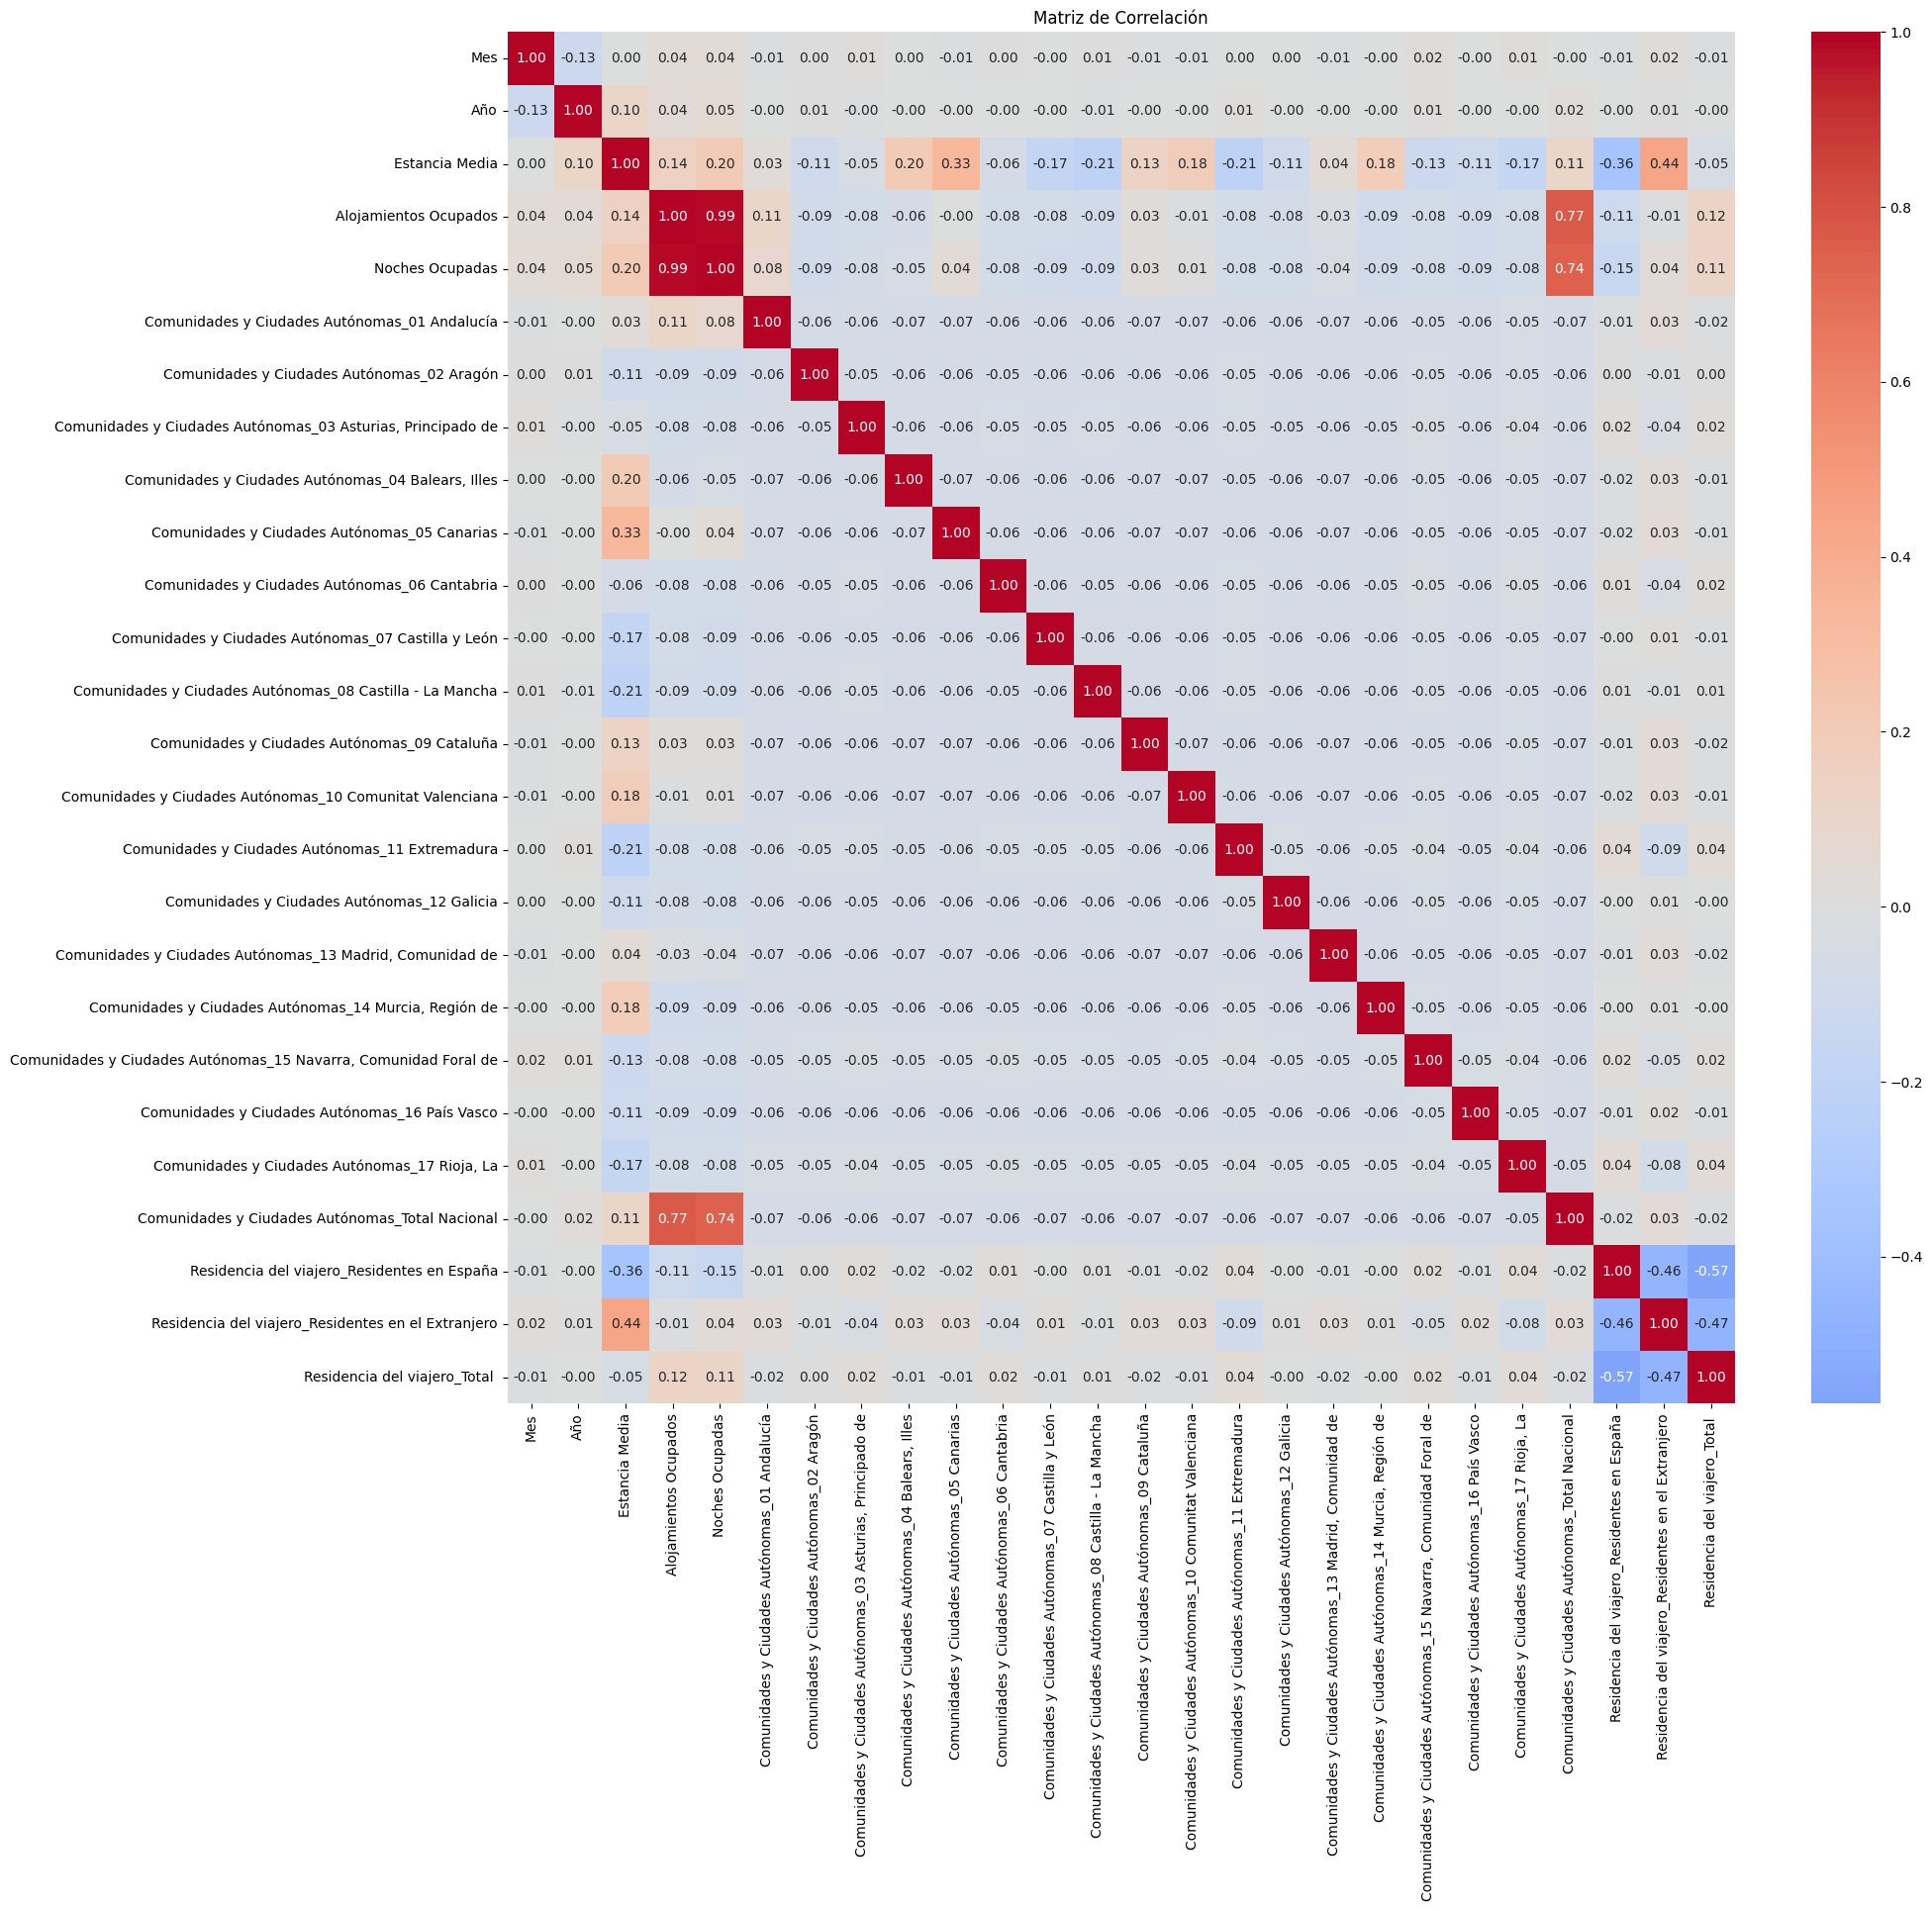

In [10]:
correlation_matrix = data_encoding.corr()
plt.figure(figsize=(20, 18))
plt.title("Matriz de Correlación")
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm', center=0)
plt.show()

### PCA

In [11]:
pca_model = PCA(n_components=2)
df_pca = pd.DataFrame(pca_model.fit_transform(data_std.iloc[:,-3:]))
df_pca

,0,1
0,-0.464517,-0.873314
1,-0.390122,-0.829405
2,-0.261115,-0.860899
3,-0.535456,-0.668973
4,-0.172701,-0.570683
...,...,...
3134,4.680291,-1.027458
3135,5.551166,-1.233626
3136,1.411552,0.118796
3137,5.024056,-0.913720


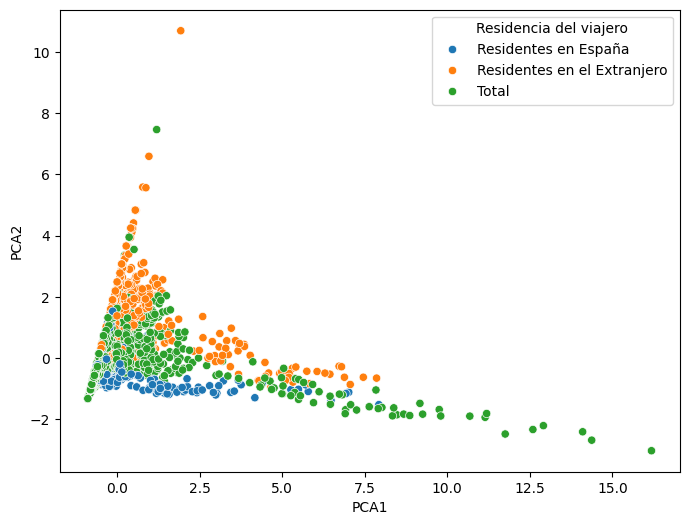

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=data_std['Residencia del viajero'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

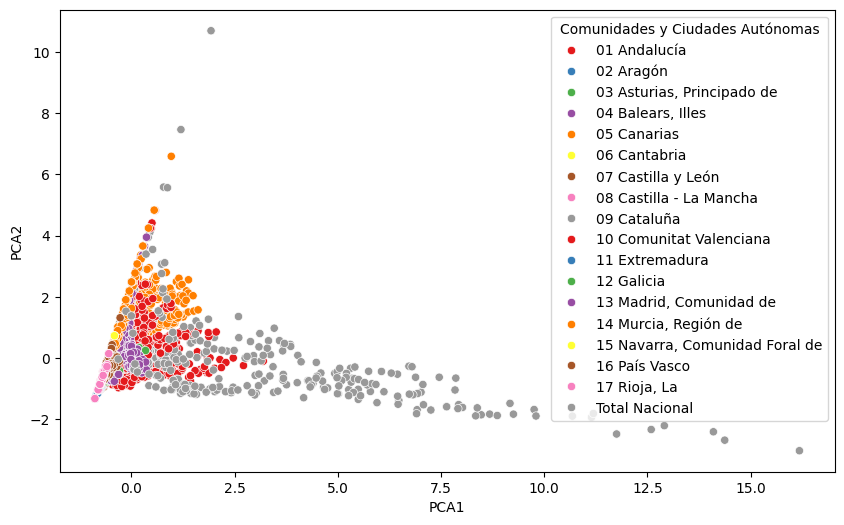

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=data_std['Comunidades y Ciudades Autónomas'], palette='Set1')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [14]:
data_encoding.to_csv('../data/processed/data_processed.csv', index=False)